<h2 style = "text-align: center; font-weight: 700">Backpropagation Algorithm</h2>

In [742]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Loading the Dataset -> IRIS

In [743]:
i = load_iris()
X = i.data
y = i.target

In [744]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [745]:
y = pd.get_dummies(y).values
print(y[0:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [746]:
df[['Y1', 'Y2', 'Y3']] = y
df.head()

,0,1,2,3,Y1,Y2,Y3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [747]:
df.rename({0:'X1', 1: 'X2', 2: 'X3', 3: 'X4'}, axis = 1, inplace = True)
df.head()

,X1,X2,X3,X4,Y1,Y2,Y3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
print(len(X_train))

120


#### Auxiliary Functions

In [749]:
def binary_sigmoidal(_in):
  return 1 / (1 + np.exp(-_in))

In [750]:
def error(y, y_hat):
  return np.mean((y - y_hat) ** 2)

In [751]:
def accuracy(y, y_hat):
  acc = 0
  for i in range(len(y)):
    if np.argmax(y_hat[i]) == np.argmax(y[i]):
      acc += 1
  
  return acc / len(y)

#### Backpropagation (Training)

In [752]:
def backpropagation(X_train, y_train, eta = 1, noofepochs = 300):
  np.random.seed(66)
  v = np.random.normal(size = (4, 2))             # random initial weights initialisation (input layer -> hidden layer 1)
  w = np.random.normal(size = (2, 3))             # (hidden layer 1 -> output layer)
  epochs = [i for i in range(noofepochs)]
  errors = []
  acc = []

  # Batch Gradient Descent is used here effectively as we're using the whole X_train
  for _ in epochs:          # to not have an array - list typeerror
    #! Forward Pass
    Zin = np.dot(X_train, v)
    z_hat = binary_sigmoidal(Zin)
    Yin = np.dot(z_hat, w)
    y_hat = binary_sigmoidal(Yin)
    errors.append(error(y_train, y_hat))
    acc.append(accuracy(y_train, y_hat))

    #~ Backward Pass
    dy = -2 * (y_train - y_hat) * (y_hat) * (1 - y_hat)
    dw = np.dot(np.transpose(z_hat), dy)
    w += (-eta * dw)
    
    dz = -2 * np.dot(dy, np.transpose(w)) * z_hat * (1 - z_hat)
    dv = np.dot(np.transpose(X_train), dz)
    v += (-eta * dv)

  return v, w, errors, acc

In [753]:
v, w, errors, acc = backpropagation(X_train, y_train)

C:\Users\samar\AppData\Local\Temp\ipykernel_15424\1954988051.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_in))


#### Training Evaluation

In [754]:
print("Initial Error: ", (errors[0]) * 100, "%", "\nFinal Error: ", (errors[-1]) * 100, "%")

Initial Error:  47.415961345511164 % 
Final Error:  25.0 %


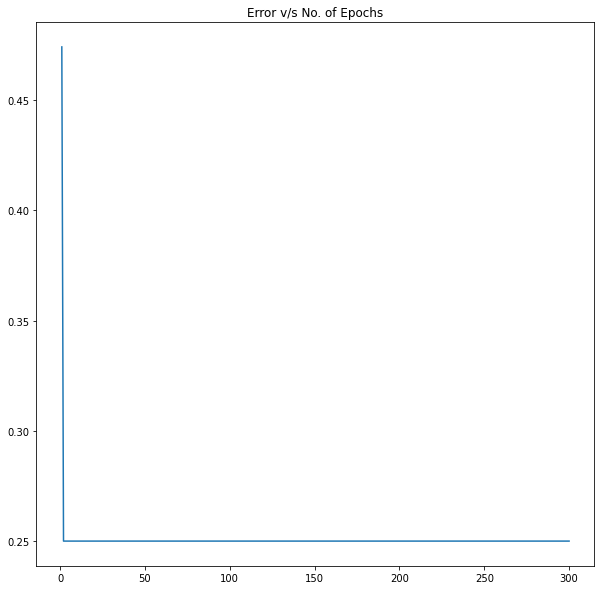

In [755]:
plt.figure(figsize = (10, 10))
plt.title("Error v/s No. of Epochs")
plt.plot([i for i in range(1, 301)], errors)

In [756]:
print("Initial Accuracy: ", (acc[0]) * 100, "%", "\nFinal Accuracy: ", (acc[-1]) * 100, "%")

Initial Accuracy:  32.5 % 
Final Accuracy:  33.33333333333333 %


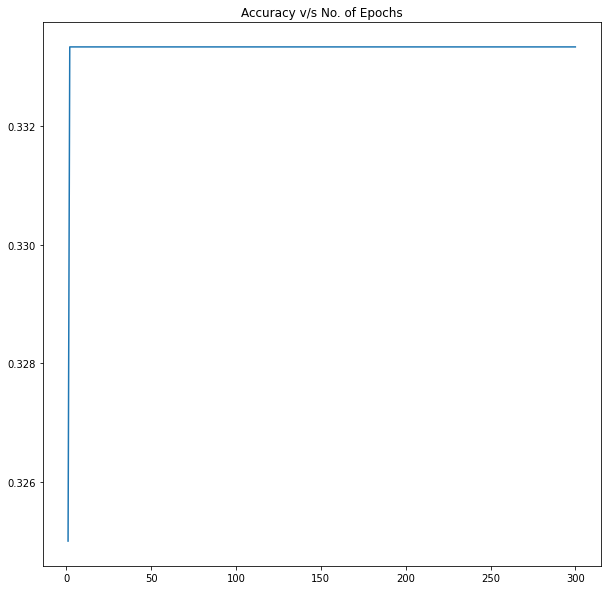

In [757]:
plt.figure(figsize = (10, 10))
plt.title("Accuracy v/s No. of Epochs")
plt.plot([i for i in range(1, 301)], acc)

#### Backpropagation (Testing)

In [758]:
def backpropagation_test(X_test, y_test, weights):
  v = weights[0]
  w = weights[1]
  
  Zin = np.dot(X_test, v)
  z_hat = binary_sigmoidal(Zin)
  Yin = np.dot(z_hat, w)
  y_hat = binary_sigmoidal(Yin)
  errors.append(error(y_test, y_hat))
  acc.append(accuracy(y_test, y_hat))
  
  test_error = error(y_test, y_hat)
  test_acc = accuracy(y_test, y_hat)
  print("Testing Error: ", test_error * 100, "%")
  print("Testing Accuracy: ", test_acc * 100, "%")

#### Testing Evaluation

In [759]:
backpropagation_test(X_test, y_test, [v, w])

Testing Error:  25.0 %
Testing Accuracy:  33.33333333333333 %


C:\Users\samar\AppData\Local\Temp\ipykernel_15424\1954988051.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-_in))
